<a href="https://colab.research.google.com/github/rozangomes/proj_imersao_ia_alura_aula4/blob/main/Pesquisa_NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas matplotlib

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import google.generativeai as genai
# Importa a biblioteca do Google Cloud Language
from google.cloud import language_v1



In [2]:
# Insere uma chave Secreta na API_KEY
from google.colab import userdata
api_key = userdata.get('secret_key')
genai.configure(api_key='secret_key')

In [10]:
# Função para coletar respostas
def coletar_resposta():
    while True:
        try:
            pontuacao = int(input("Em uma escala de 1 a 10, o quanto você recomendaria nosso restaurante a um amigo ou familiar? "))
            if 0 <= pontuacao <= 10:
                motivo = input("Por favor, explique o motivo da sua nota: ")
                return pontuacao, motivo
            else:
                print("Pontuação inválida. Por favor, digite um número entre 1 e 10.")
        except ValueError:
            print("Entrada inválida. Por favor, digite um número.")



In [11]:
# Coletar respostas
respostas = []
while True:
    resposta = coletar_resposta()
    respostas.append(resposta)

    continuar = input("Deseja adicionar outra resposta? (s/n): ")
    if continuar.lower() != 's':
        break



Em uma escala de 1 a 10, o quanto você recomendaria nosso restaurante a um amigo ou familiar? 10
Por favor, explique o motivo da sua nota: Muito boa comida
Deseja adicionar outra resposta? (s/n): n


In [12]:
# Criar DataFrame
df = pd.DataFrame(respostas, columns=["Pontuação", "Motivo"])

# Classificar respondentes
df["Classificação"] = pd.cut(df["Pontuação"],
                              bins=[0, 6, 8, 10],
                              labels=["Detratores", "Passivos", "Promotores"])

# Calcular NPS
nps = (df["Classificação"].value_counts(normalize=True)["Promotores"] -
       df["Classificação"].value_counts(normalize=True)["Detratores"]) * 100




--- Resultados da Pesquisa NPS ---
NPS: -100.00
Classificação
Detratores    2
Passivos      0
Promotores    0
Name: count, dtype: int64




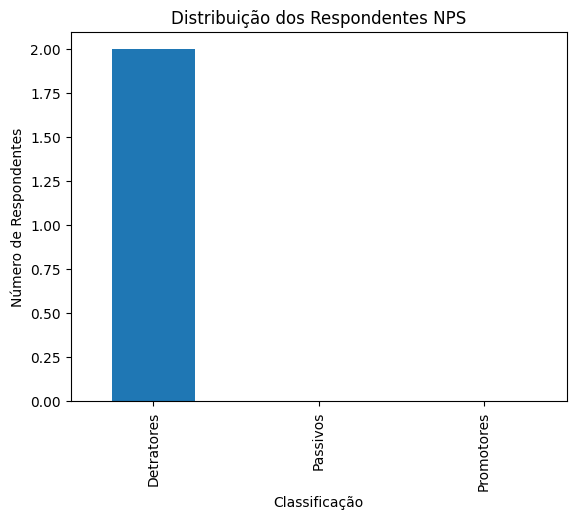

In [9]:
# Exibir resultados
print("\n--- Resultados da Pesquisa NPS ---")
print(f"NPS: {nps:.2f}")
print(df["Classificação"].value_counts())


# Criar gráfico de barras
print('\n')
plt.figure()
df["Classificação"].value_counts().plot(kind="bar")
plt.xlabel("Classificação")
plt.ylabel("Número de Respondentes")
plt.title("Distribuição dos Respondentes NPS")
plt.show()